In [493]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn import metrics


### Read CSV file

In [494]:
# read csv 
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [495]:
#show all rows
#pd.options.display.max_rows = None

In [496]:
# number or rows and columns
df.shape

(8378, 195)

In [497]:
## check for duplicates
df[df.duplicated()].count()

iid         0
id          0
gender      0
idg         0
condtn      0
           ..
attr5_3     0
sinc5_3     0
intel5_3    0
fun5_3      0
amb5_3      0
Length: 195, dtype: int64

In [498]:
#check for column data types
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [499]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [500]:
dff = df.copy()
#count NAN
s = df.isnull().sum(axis = 0)

In [501]:
# loop to deleted columns with nulls 500 and greater
for col in dff: 
   if s[col] > 400:  
       del dff[col]
del dff['field']
del dff['career']
del dff['from']
del dff['idg']
del dff['pid']
del dff['iid']
del dff['id']

In [502]:
dff.shape

(8378, 78)

In [432]:
# for feature in dff.columns: 
#     if dff[feature].dtype == 'object': 
#         dff[feature] = pd.Categorical(dff[feature])
# dff.head(10)

In [433]:
#oneHotCols=["from"]

In [434]:
#as_Selected=pd.get_dummies(dff,oneHotCols)


In [503]:
dff.head()

,gender,condtn,wave,round,position,order,partner,match,int_corr,samerace,...,intel3_1,amb3_1,dec,attr,sinc,intel,fun,like,prob,met
0,0,1,1,10,7,4,1,0,0.14,0,...,8.0,7.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,0,1,1,10,7,3,2,0,0.54,0,...,8.0,7.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,0,1,1,10,7,10,3,1,0.16,1,...,8.0,7.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,0,1,1,10,7,5,4,1,0.61,0,...,8.0,7.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,0,1,1,10,7,7,5,1,0.21,0,...,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


In [504]:
dff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,8378.0,0.500597,0.500029,0.0,0.0,1.0,1.0,1.0
condtn,8378.0,1.828837,0.376673,1.0,2.0,2.0,2.0,2.0
wave,8378.0,11.350919,5.995903,1.0,7.0,11.0,15.0,21.0
round,8378.0,16.872046,4.358458,5.0,14.0,18.0,20.0,22.0
position,8378.0,9.042731,5.514939,1.0,4.0,8.0,13.0,22.0
...,...,...,...,...,...,...,...,...
intel,8082.0,7.368597,1.550453,0.0,6.0,7.0,8.0,10.0
fun,8028.0,6.400598,1.953702,0.0,5.0,7.0,8.0,10.0
like,8138.0,6.134087,1.841285,0.0,5.0,6.0,7.0,10.0
prob,8069.0,5.207523,2.129565,0.0,4.0,5.0,7.0,10.0


In [505]:
dff.dtypes

gender        int64
condtn        int64
wave          int64
round         int64
position      int64
             ...   
intel       float64
fun         float64
like        float64
prob        float64
met         float64
Length: 78, dtype: object

In [506]:
corr_matrix = dff.corr().abs()
print(corr_matrix)

            gender    condtn      wave     round  position     order  \
gender    1.000000  0.002627  0.001264  0.020630  0.001091  0.006685   
condtn    0.002627  1.000000  0.219627  0.816316  0.329120  0.324108   
wave      0.001264  0.219627  1.000000  0.237234  0.083091  0.092955   
round     0.020630  0.816316  0.237234  1.000000  0.385781  0.399942   
position  0.001091  0.329120  0.083091  0.385781  1.000000  0.155179   
...            ...       ...       ...       ...       ...       ...   
intel     0.050754  0.019171  0.045748  0.059767  0.031989  0.081784   
fun       0.061249  0.031020  0.006949  0.061357  0.009375  0.040611   
like      0.076875  0.026533  0.043057  0.059355  0.034753  0.044133   
prob      0.003813  0.032321  0.021580  0.052729  0.045739  0.076251   
met       0.002997  0.142807  0.524492  0.166102  0.066345  0.064130   

           partner     match  int_corr  samerace  ...  intel3_1    amb3_1  \
gender    0.010160  0.000530  0.000954  0.000966  ...  0.0

In [507]:
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_Select = [column for column in upper.columns if any(upper[column] >= 0.1)]

In [508]:
# print(to_Select)

In [509]:
# columns to list
dff.columns

Index(['gender', 'condtn', 'wave', 'round', 'position', 'order', 'partner',
       'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met'],
      dtype='object')

### Initial Prep for the Training Model

In [442]:
# Initial Data Selected for Sample and Traing run
# as_Selected =dff[data]
# print(as_Selected.columns)
# print("<------------------------->")
# print(as_Selected.shape)

as_Selected = dff[['gender', 'condtn', 'wave', 'round', 'position', 'order', 'partner',
       'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met']]

In [443]:
# as_Selected.head()

### Final attributes selected for the Model

In [510]:
#Final Train Code Attribute Model 
as_Selected = dff[['dec','match','like','dec_o','attr1_1','attr2_1','sinc','prob','attr']]

In [445]:
#as_Selected = dff[['dec','match','like','attr','dec_o','fun','attr_o','prob','sinc','intel']]

In [511]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='match', ylabel='count'>

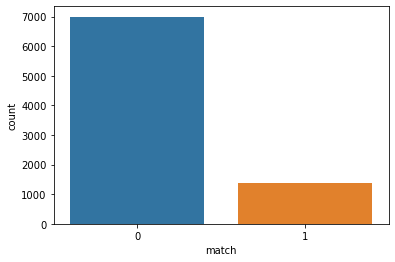

In [512]:
sns.countplot(as_Selected['match'])

<AxesSubplot:xlabel='prob', ylabel='Density'>

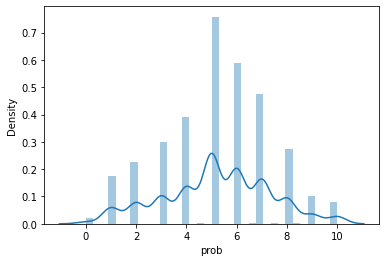

In [513]:

sns.distplot(as_Selected['prob'])

<AxesSubplot:xlabel='attr', ylabel='Density'>

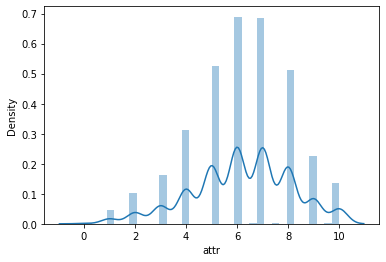

In [514]:
sns.distplot(as_Selected['attr'])

<AxesSubplot:xlabel='like', ylabel='Density'>

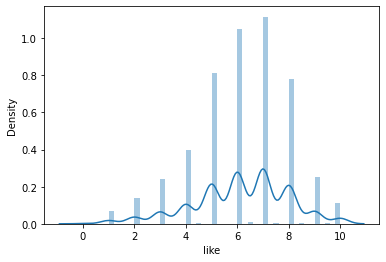

In [515]:
sns.distplot(as_Selected['like'])

<AxesSubplot:xlabel='sinc', ylabel='Density'>

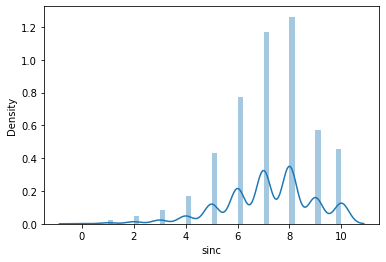

In [516]:
sns.distplot(as_Selected['sinc'])

<AxesSubplot:xlabel='sinc', ylabel='attr'>

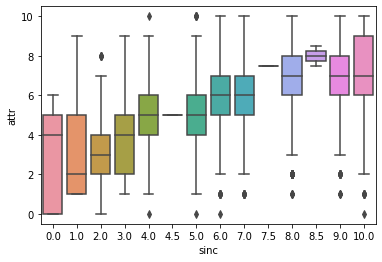

In [517]:
sns.boxplot(x='sinc', y = 'attr', data = as_Selected)

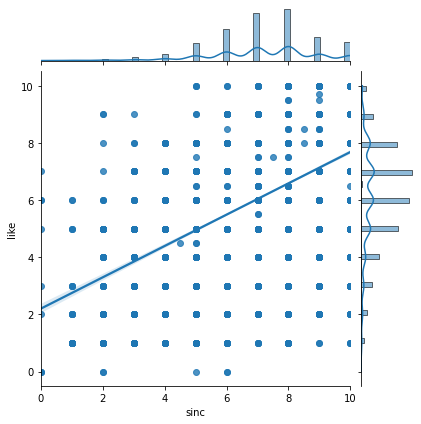

In [518]:
sns.jointplot(x = 'sinc', y = 'like', data = as_Selected, kind = 'reg')

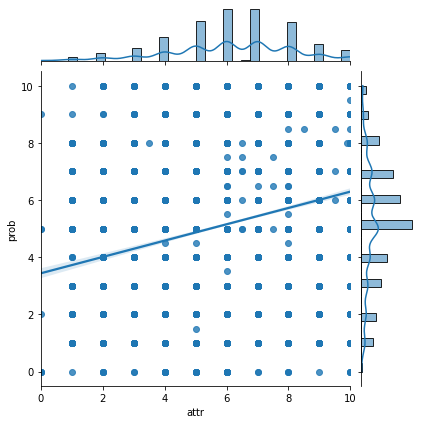

In [519]:
sns.jointplot(x = 'attr', y = 'prob', data = as_Selected, kind = 'reg')

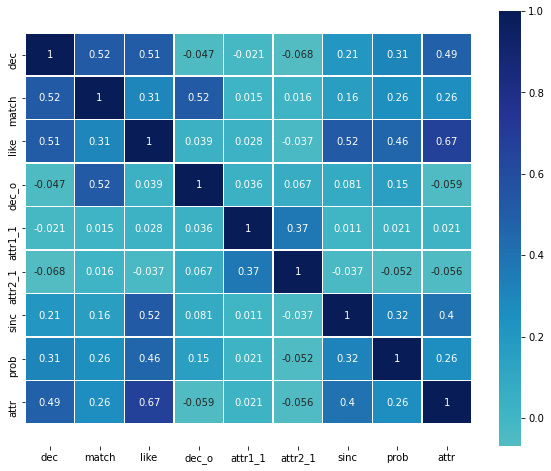

In [520]:
plt.figure(figsize = (10,8))
sns.heatmap(as_Selected.corr(),
           annot = True,
           linewidths = 0.5,
           center = 0,
           cmap = "YlGnBu")
b, t = plt.ylim()
b +=0.5
t -= 0.5
plt.ylim (b,t)
plt.show()

### Select fields use to to determine Decision

In [521]:
as_Selected.columns.tolist()

['dec', 'match', 'like', 'dec_o', 'attr1_1', 'attr2_1', 'sinc', 'prob', 'attr']

In [522]:
as_Selected.isnull().sum(axis = 0).sort_values(ascending=False)

prob       309
sinc       277
like       240
attr       202
attr2_1     79
attr1_1     79
dec_o        0
match        0
dec          0
dtype: int64

### Fill in null values with Mean or Median

In [523]:
for col in as_Selected.columns:
    as_Selected[col].fillna(as_Selected[col].median(), inplace=True)

In [524]:
as_Selected.shape

(8378, 9)

In [525]:
as_Selected.describe()

,dec,match,like,dec_o,attr1_1,attr2_1,sinc,prob,attr
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.419909,0.164717,6.130246,0.419551,22.490920,30.311629,7.169372,5.199869,6.185414
std,0.493573,0.370947,1.814855,0.493515,12.530536,16.181434,1.711587,2.090285,1.926733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,0.000000,15.000000,20.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,6.000000,0.000000,20.000000,25.000000,7.000000,5.000000,6.000000
75%,1.000000,0.000000,7.000000,1.000000,25.000000,40.000000,8.000000,7.000000,8.000000
max,1.000000,1.000000,10.000000,1.000000,100.000000,100.000000,10.000000,10.000000,10.000000


In [526]:
as_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dec      8378 non-null   int64  
 1   match    8378 non-null   int64  
 2   like     8378 non-null   float64
 3   dec_o    8378 non-null   int64  
 4   attr1_1  8378 non-null   float64
 5   attr2_1  8378 non-null   float64
 6   sinc     8378 non-null   float64
 7   prob     8378 non-null   float64
 8   attr     8378 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 589.2 KB


In [527]:
# for column in as_Selected.select_dtypes(include='object'):
#     print(rename_df[column].value_counts())
#     print()

In [528]:
# sns.pairplot(as_Selected,diag_kind='kde')

In [529]:
# plt.figure(figsize=(25,25))
# sns.heatmap(as_Selected.corr(),annot=True,fmt='.2f',cmap='rainbow', )
# plt.show()

In [530]:
# Missing values need to be replaced
pd.DataFrame(as_Selected.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
dec,0
match,0
like,0
dec_o,0
attr1_1,0
attr2_1,0
sinc,0
prob,0
attr,0


In [531]:
#new_df = rename_df.copy()
#df = new_df.dropna()
df = as_Selected.copy()
#pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

### Pre-processing & Split Data

In [532]:
# from feature_engine.encoding import DecisionTreeEncoder

In [533]:

X = df.drop("dec" , axis=1)
y = df.pop("dec")

In [534]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train1, X_test1, y_train, y_test = train_test_split(X, y, random_state=42)

### Build Decision Tree Model

In [535]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
# # Scale your data
# X_scaler = MinMaxScaler().fit(X_train1)
# X_train = X_scaler.transform(X_train1)
# X_test = X_scaler.transform(X_test1)

In [536]:
# try gini
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dTree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [537]:
# try entropy
# dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
# dTree.fit(X_train, y_train)

### Scoring our Decision Tree

In [538]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))


Accuracy on training set :  0.9902912621359223
Accuracy on test set :  0.843436754176611


In [539]:
#Checking number of positives
y.sum(axis = 0)

3518

In [540]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    print(cm)
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [541]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

### Confusion Matrix

[[1026  161]
 [ 167  741]]


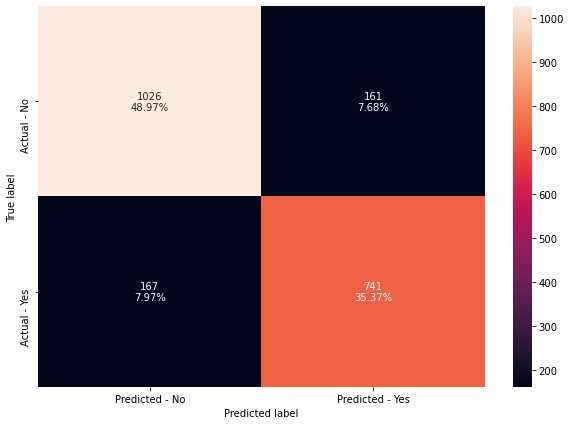

In [542]:
make_confusion_matrix(dTree,y_test)

In [543]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9793103448275862
Recall on test set :  0.816079295154185


### Visualizing the Decision Tree

In [544]:
features = list(X.columns)
print(features)

['match', 'like', 'dec_o', 'attr1_1', 'attr2_1', 'sinc', 'prob', 'attr']


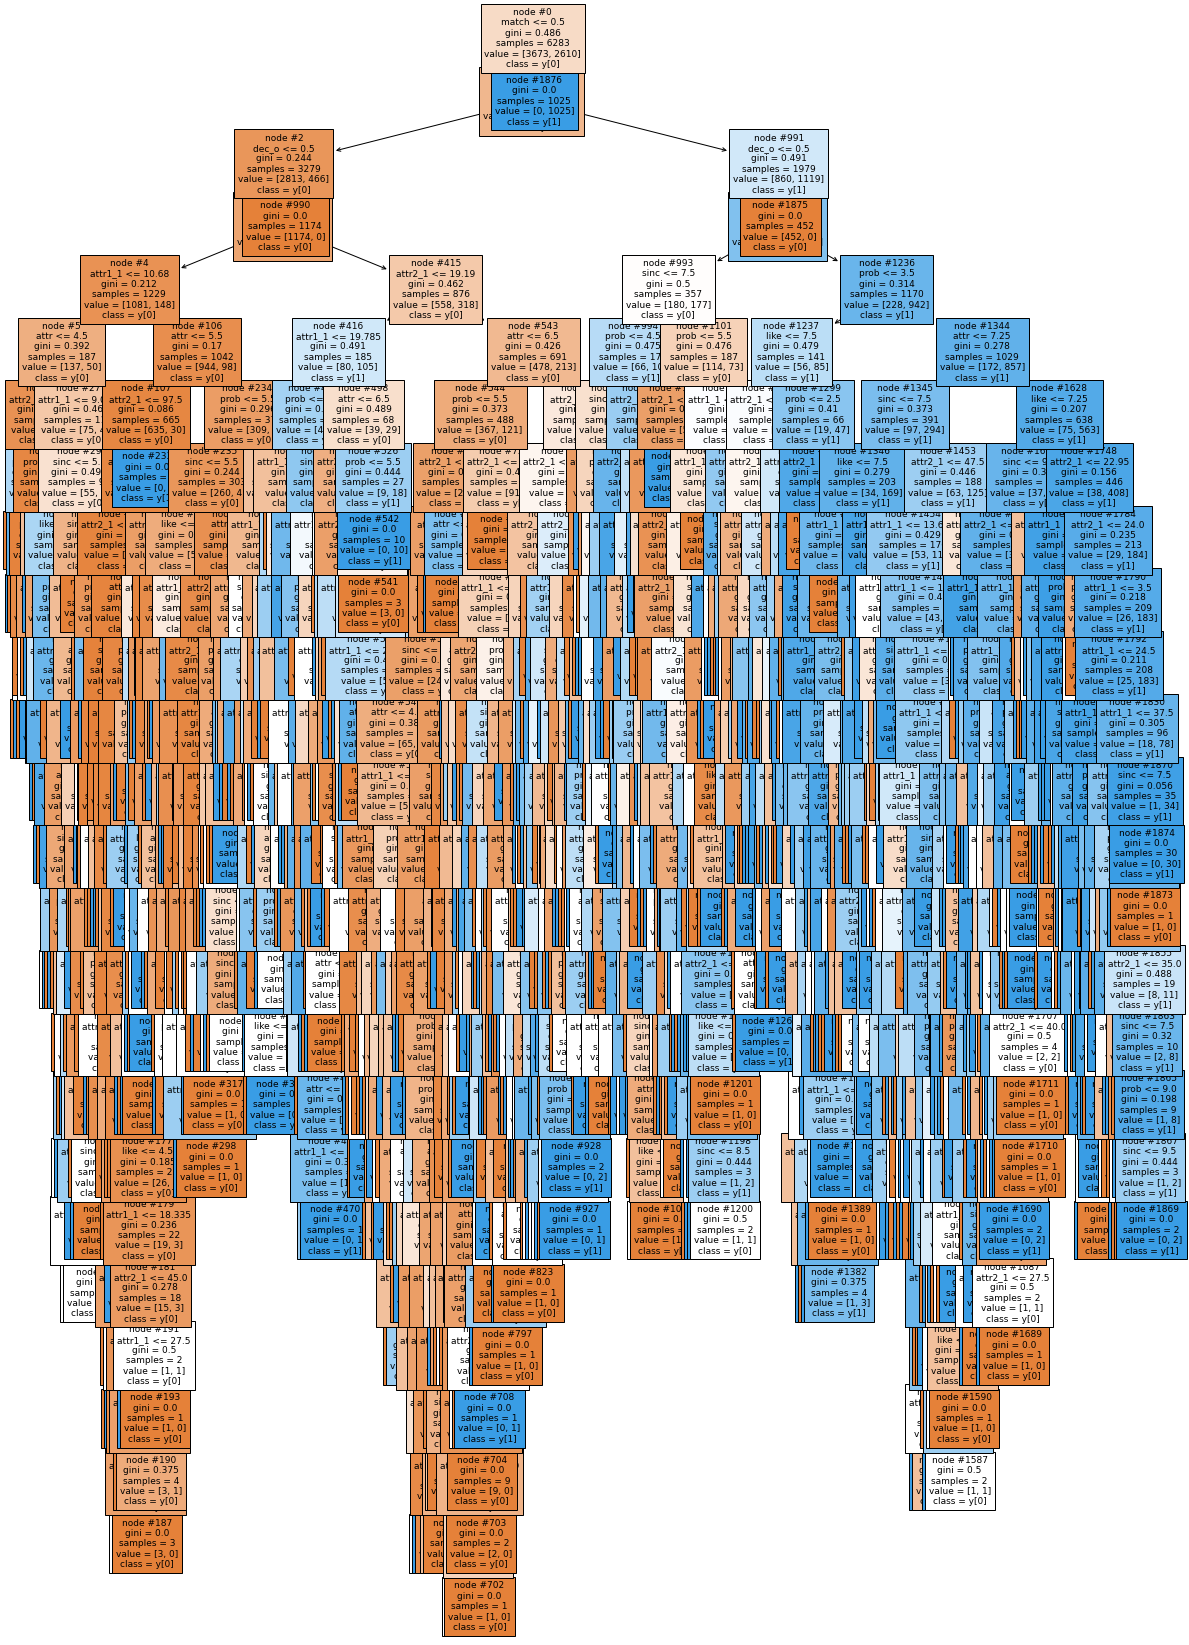

In [545]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [549]:
# Text report showing the rules of a decision tree
print(tree.export_text(dTree,feature_names=features,show_weights=True))

|--- match <= 0.50
|   |--- like <= 6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- like <= 5.75
|   |   |   |   |--- attr1_1 <= 10.68
|   |   |   |   |   |--- attr <= 4.50
|   |   |   |   |   |   |--- attr2_1 <= 12.50
|   |   |   |   |   |   |   |--- prob <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- prob >  2.50
|   |   |   |   |   |   |   |   |--- prob <= 7.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |   |   |--- prob >  7.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- attr2_1 >  12.50
|   |   |   |   |   |   |   |--- prob <= 7.00
|   |   |   |   |   |   |   |   |--- prob <= 4.50
|   |   |   |   |   |   |   |   |   |--- weights: [42.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- prob >  4.50
|   |   |   |   |   |   |   |   |   |--- sinc <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- like <= 3.50

In [547]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

              Imp
match    0.280605
like     0.187923
dec_o    0.150315
attr1_1  0.098604
attr2_1  0.094637
prob     0.068936
sinc     0.060578
attr     0.058401


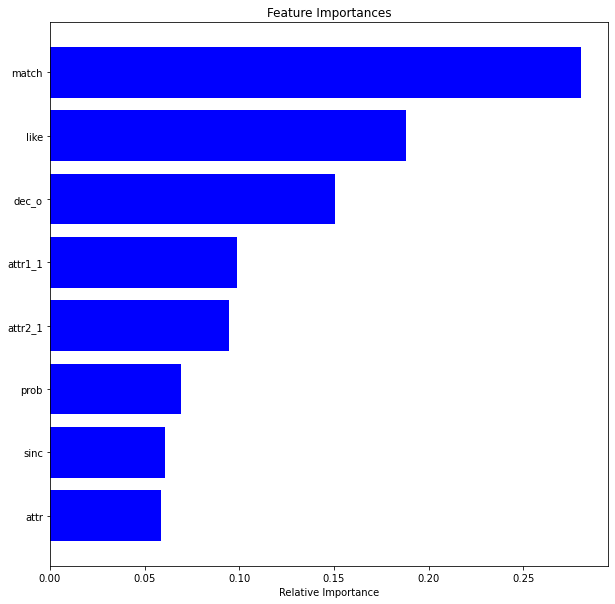

In [550]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### According to the chart Attractive is the most important

### Reducing over fitting

In [551]:
# Try gini
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=42)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [552]:
# Try entropy
# dTree1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=42)
# dTree1.fit(X_train, y_train)

### Confusion Matrix - decision tree with depth

[[1035  152]
 [ 160  748]]


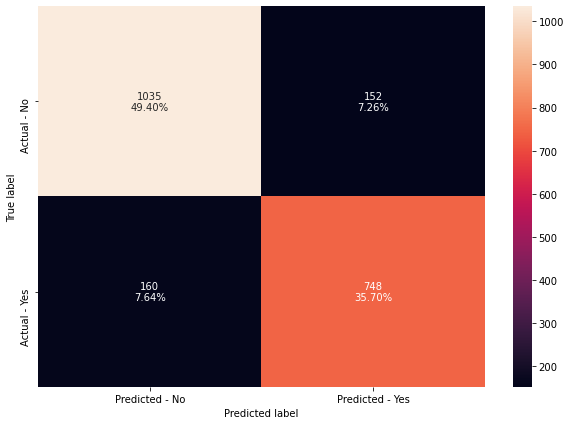

In [553]:
make_confusion_matrix(dTree1, y_test)

In [554]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8713990132102499
Accuracy on test set :  0.8510739856801909
Recall on training set :  0.8337164750957854
Recall on test set :  0.8237885462555066


##### Accuracy for Training and Test are closer so accurracy is better

### Visualizing the Decision Tree

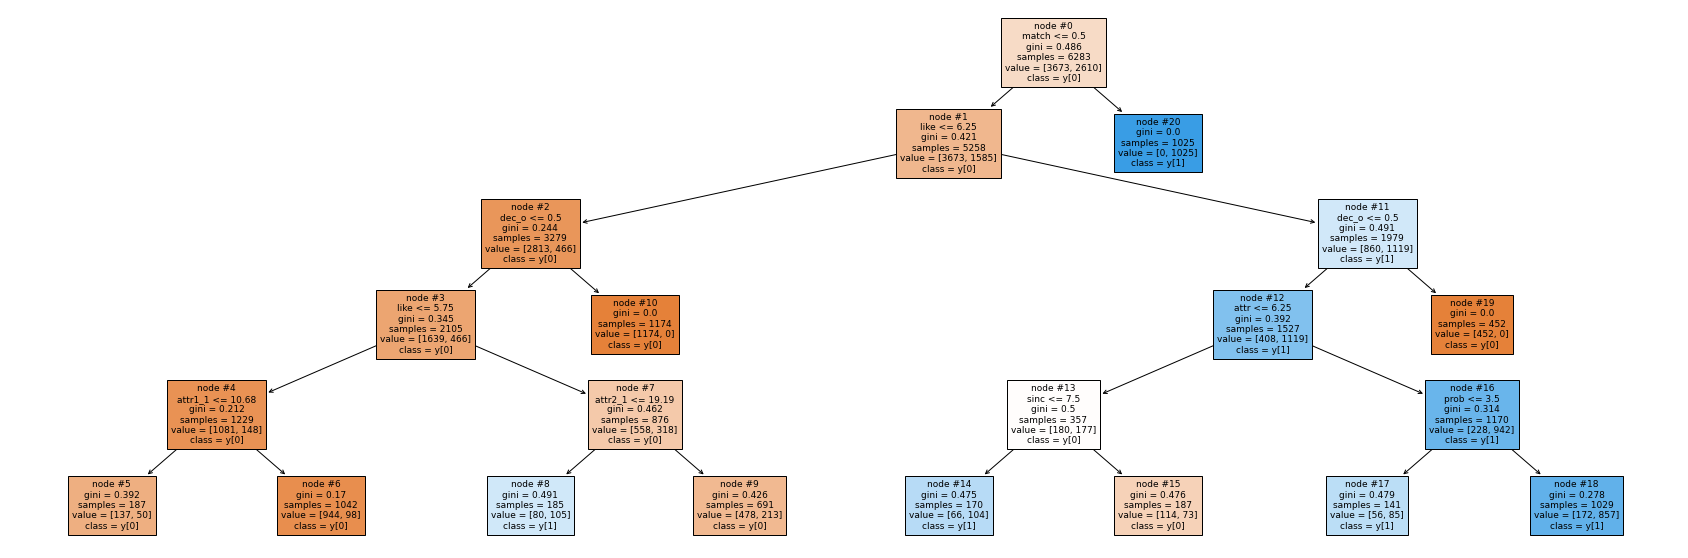

In [555]:
plt.figure(figsize=(30,10))

tree.plot_tree(dTree1,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [566]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dTree1,feature_names=features,show_weights=True))

|--- match <= 0.50
|   |--- like <= 6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- like <= 5.75
|   |   |   |   |--- attr1_1 <= 10.68
|   |   |   |   |   |--- weights: [137.00, 50.00] class: 0
|   |   |   |   |--- attr1_1 >  10.68
|   |   |   |   |   |--- weights: [944.00, 98.00] class: 0
|   |   |   |--- like >  5.75
|   |   |   |   |--- attr2_1 <= 19.19
|   |   |   |   |   |--- weights: [80.00, 105.00] class: 1
|   |   |   |   |--- attr2_1 >  19.19
|   |   |   |   |   |--- weights: [478.00, 213.00] class: 0
|   |   |--- dec_o >  0.50
|   |   |   |--- weights: [1174.00, 0.00] class: 0
|   |--- like >  6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- attr <= 6.25
|   |   |   |   |--- sinc <= 7.50
|   |   |   |   |   |--- weights: [66.00, 104.00] class: 1
|   |   |   |   |--- sinc >  7.50
|   |   |   |   |   |--- weights: [114.00, 73.00] class: 0
|   |   |   |--- attr >  6.25
|   |   |   |   |--- prob <= 3.50
|   |   |   |   |   |--- weights: [56.00, 85.00] class: 1
|   |   |   |   |-

In [567]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

              Imp
match    0.442596
like     0.265674
dec_o    0.237090
attr     0.027675
attr2_1  0.010376
prob     0.006937
attr1_1  0.005037
sinc     0.004615


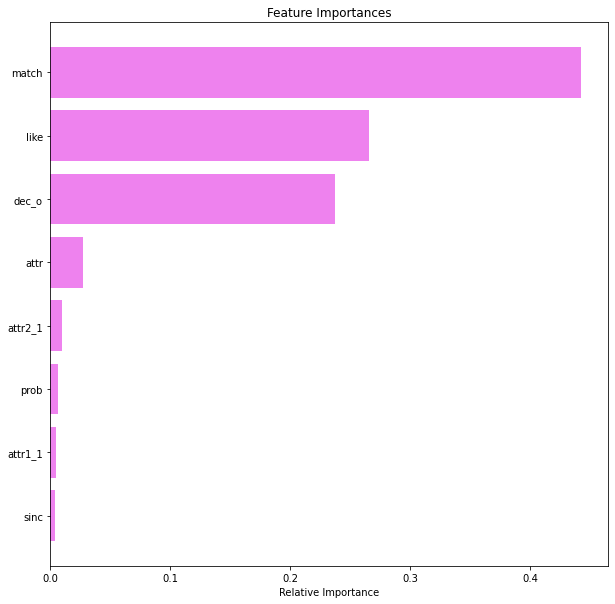

In [568]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Export Model

In [559]:
# DECISION TREE
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the comamand to install in terminal/git-bash
import joblib
decisionTree_model= 'decisionTree_model.sav'
joblib.dump( dTree1, decisionTree_model)

['decisionTree_model.sav']

In [228]:
model = joblib.load(decisionTree_model, mmap_mode=None)

In [ ]:
print(model.predict([[]]))

### Using GridSearch for Hyperparameter tuning of our tree model

In [560]:
from sklearn.model_selection import GridSearchCV

In [561]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       random_state=42)

[[1035  152]
 [ 160  748]]


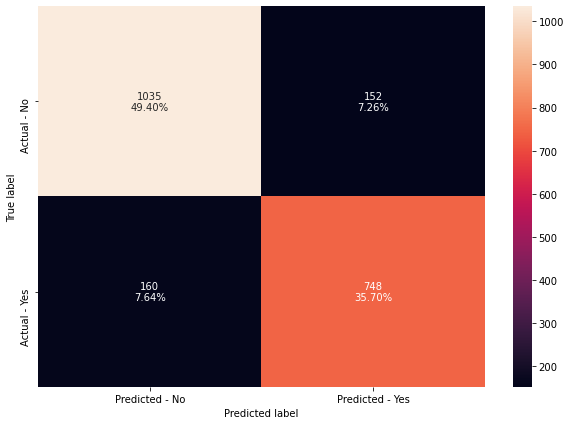

In [562]:
make_confusion_matrix(estimator,y_test)

In [563]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8713990132102499
Accuracy on test set :  0.8510739856801909
Recall on training set :  0.8337164750957854
Recall on test set :  0.8237885462555066


In [564]:
# # run when null values are fixed
# y=df['Decision']
# X=df[features]

# # Create decision tree classifer object
# clf = tree.DecisionTreeClassifier()
# # Train model
# model = clf.fit(X,y)

In [565]:
# # run when null values are fixed
# from IPython.display import Image  
# from six import StringIO
# from sklearn.tree import export_graphviz
# import pydot
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [ ]:
# # Create DOT data
# dot_data = StringIO()
# tree.export_graphviz(model, out_file = dot_data,feature_names = features)
# # Draw graph
# #graph =  pydot.graph_from_dot_data(dot_data.getvalue())
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# print(graph)

In [ ]:
# # Show graph
# Image(graph.create_png())